In [212]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [213]:
df = pd.read_csv(r"C:\Users\Nitesh Kesharwani\Downloads\Mushroom_data\Data.csv")
df.head(10)

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,15.26,x,g,o,f,e,NaN,w,16.95,...,s,y,w,u,w,t,g,NaN,d,w
1,p,16.60,x,g,o,f,e,NaN,w,17.99,...,s,y,w,u,w,t,g,NaN,d,u
2,p,14.07,x,g,o,f,e,NaN,w,17.80,...,s,y,w,u,w,t,g,NaN,d,w
3,p,14.17,f,h,e,f,e,NaN,w,15.77,...,s,y,w,u,w,t,p,NaN,d,w
4,p,14.64,x,h,o,f,e,NaN,w,16.53,...,s,y,w,u,w,t,p,NaN,d,w
5,p,15.34,x,g,o,f,e,NaN,w,17.84,...,s,y,w,u,w,t,p,NaN,d,u
6,p,14.85,f,h,o,f,e,NaN,w,17.71,...,s,y,w,u,w,t,g,NaN,d,w
7,p,14.86,x,h,e,f,e,NaN,w,17.03,...,s,y,w,u,w,t,p,NaN,d,u
8,p,12.85,f,g,o,f,e,NaN,w,17.27,...,s,y,w,u,w,t,p,NaN,d,a
9,p,13.55,f,g,e,f,e,NaN,w,16.04,...,s,y,w,u,w,t,p,NaN,d,w


In [214]:
df.columns

Index(['class', 'cap-diameter', 'cap-shape', 'cap-surface', 'cap-color',
       'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'gill-color',
       'stem-height', 'stem-width', 'stem-root', 'stem-surface', 'stem-color',
       'veil-type', 'veil-color', 'has-ring', 'ring-type', 'spore-print-color',
       'habitat', 'season'],
      dtype='object')

In [215]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 61069 non-null  object 
 1   cap-diameter          61069 non-null  float64
 2   cap-shape             61069 non-null  object 
 3   cap-surface           46949 non-null  object 
 4   cap-color             61069 non-null  object 
 5   does-bruise-or-bleed  61069 non-null  object 
 6   gill-attachment       51185 non-null  object 
 7   gill-spacing          36006 non-null  object 
 8   gill-color            61069 non-null  object 
 9   stem-height           61069 non-null  float64
 10  stem-width            61069 non-null  float64
 11  stem-root             9531 non-null   object 
 12  stem-surface          22945 non-null  object 
 13  stem-color            61069 non-null  object 
 14  veil-type             3177 non-null   object 
 15  veil-color         

In [216]:
# Display columns with missing values
columns_with_missing_values = df.isnull().sum()
print("Columns with missing values:\n", columns_with_missing_values[columns_with_missing_values > 0])

Columns with missing values:
 cap-surface          14120
gill-attachment       9884
gill-spacing         25063
stem-root            51538
stem-surface         38124
veil-type            57892
veil-color           53656
ring-type             2471
spore-print-color    54715
dtype: int64


In [217]:
# Drop columns with more than 30% missing values
threshold = 0.3 * len(df)
columns_to_drop = df.columns[columns_with_missing_values > threshold]
print("Columns to drop :\n", columns_to_drop)
df_cleaned = df.drop(columns = columns_to_drop)

Columns to drop :
 Index(['gill-spacing', 'stem-root', 'stem-surface', 'veil-type', 'veil-color',
       'spore-print-color'],
      dtype='object')


In [218]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 61069 non-null  object 
 1   cap-diameter          61069 non-null  float64
 2   cap-shape             61069 non-null  object 
 3   cap-surface           46949 non-null  object 
 4   cap-color             61069 non-null  object 
 5   does-bruise-or-bleed  61069 non-null  object 
 6   gill-attachment       51185 non-null  object 
 7   gill-color            61069 non-null  object 
 8   stem-height           61069 non-null  float64
 9   stem-width            61069 non-null  float64
 10  stem-color            61069 non-null  object 
 11  has-ring              61069 non-null  object 
 12  ring-type             58598 non-null  object 
 13  habitat               61069 non-null  object 
 14  season                61069 non-null  object 
dtypes: float64(3), obje

In [219]:
# Imputing missing values in columns with the most common value

for missing_value_column in df_cleaned.columns[df_cleaned.isnull().sum() > 0]:
    df_cleaned[missing_value_column].fillna(df_cleaned[missing_value_column].mode()[0], inplace=True)

In [220]:
# Removing Rows with dulicate Data
df_cleaned = df_cleaned.drop_duplicates()

In [221]:
df_cleaned_unlabelled = df_cleaned.copy()

# Data is Categorical hence converting it to Numerical

from sklearn.preprocessing import LabelEncoder

labelencoder=LabelEncoder()
for column in df_cleaned.drop(columns = ["cap-diameter", "stem-height", "stem-width"]).columns:
    df_cleaned[column] = labelencoder.fit_transform(df_cleaned[column])

In [222]:
df_cleaned.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season
0,1,15.26,6,2,6,0,2,10,16.95,17.09,11,1,2,0,3
1,1,16.60,6,2,6,0,2,10,17.99,18.19,11,1,2,0,2
2,1,14.07,6,2,6,0,2,10,17.80,17.74,11,1,2,0,3
3,1,14.17,2,3,1,0,2,10,15.77,15.98,11,1,5,0,3
4,1,14.64,6,3,6,0,2,10,16.53,17.20,11,1,5,0,3


In [223]:
df_cleaned_unlabelled.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season
0,p,15.26,x,g,o,f,e,w,16.95,17.09,w,t,g,d,w
1,p,16.60,x,g,o,f,e,w,17.99,18.19,w,t,g,d,u
2,p,14.07,x,g,o,f,e,w,17.80,17.74,w,t,g,d,w
3,p,14.17,f,h,e,f,e,w,15.77,15.98,w,t,p,d,w
4,p,14.64,x,h,o,f,e,w,16.53,17.20,w,t,p,d,w


In [224]:
df_cleaned_unlabelled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60923 entries, 0 to 61068
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 60923 non-null  object 
 1   cap-diameter          60923 non-null  float64
 2   cap-shape             60923 non-null  object 
 3   cap-surface           60923 non-null  object 
 4   cap-color             60923 non-null  object 
 5   does-bruise-or-bleed  60923 non-null  object 
 6   gill-attachment       60923 non-null  object 
 7   gill-color            60923 non-null  object 
 8   stem-height           60923 non-null  float64
 9   stem-width            60923 non-null  float64
 10  stem-color            60923 non-null  object 
 11  has-ring              60923 non-null  object 
 12  ring-type             60923 non-null  object 
 13  habitat               60923 non-null  object 
 14  season                60923 non-null  object 
dtypes: float64(3), obje

In [225]:
df_cleaned_unlabelled[["cap-diameter", "stem-height", "stem-width"]].describe()

,cap-diameter,stem-height,stem-width
count,60923.000000,60923.000000,60923.000000
mean,6.741957,6.597202,12.178484
std,5.268435,3.358757,10.030361
min,0.380000,0.000000,0.000000
25%,3.490000,4.650000,5.250000
50%,5.880000,5.960000,10.220000
75%,8.550000,7.750000,16.580000
max,62.340000,33.920000,103.910000


In [226]:
df_cleaned_unlabelled.drop(columns = ["class", "cap-diameter", "stem-height", "stem-width"]).describe(include='object').transpose()

,count,unique,top,freq
cap-shape,60923,7,x,26932
cap-surface,60923,11,t,22304
cap-color,60923,12,n,24205
does-bruise-or-bleed,60923,2,f,50333
gill-attachment,60923,7,a,22552
gill-color,60923,12,w,18492
stem-color,60923,13,w,22926
has-ring,60923,2,f,45756
ring-type,60923,8,f,50686
habitat,60923,8,d,44063


#### Is Data Balanced?

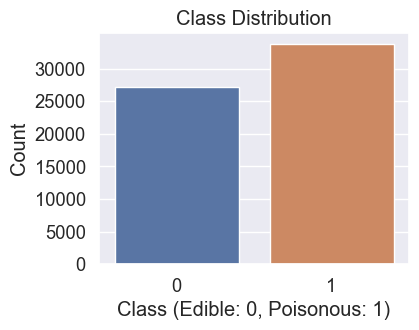

In [227]:
# Checking if data is balanced or not
class_distribution = df_cleaned['class'].value_counts()

# Plotting the class distribution as a bar chart
plt.figure(figsize=(4, 3))
sns.countplot(x='class', data=df_cleaned)
plt.title('Class Distribution')
plt.xlabel('Class (Edible: 0, Poisonous: 1)')
plt.ylabel('Count')
plt.yticks(range(0, max(class_distribution) + 1, 5000))
plt.show()

In [228]:
# Scaling Features as they have different scales
features = df_cleaned.drop(columns = ["class"]).columns.values
print(len(features))

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_cleaned[:] = scaler.fit_transform(df_cleaned[:])

14


C:\Users\Nitesh Kesharwani\AppData\Local\Temp\ipykernel_22352\67256386.py:7: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_cleaned[:] = scaler.fit_transform(df_cleaned[:])


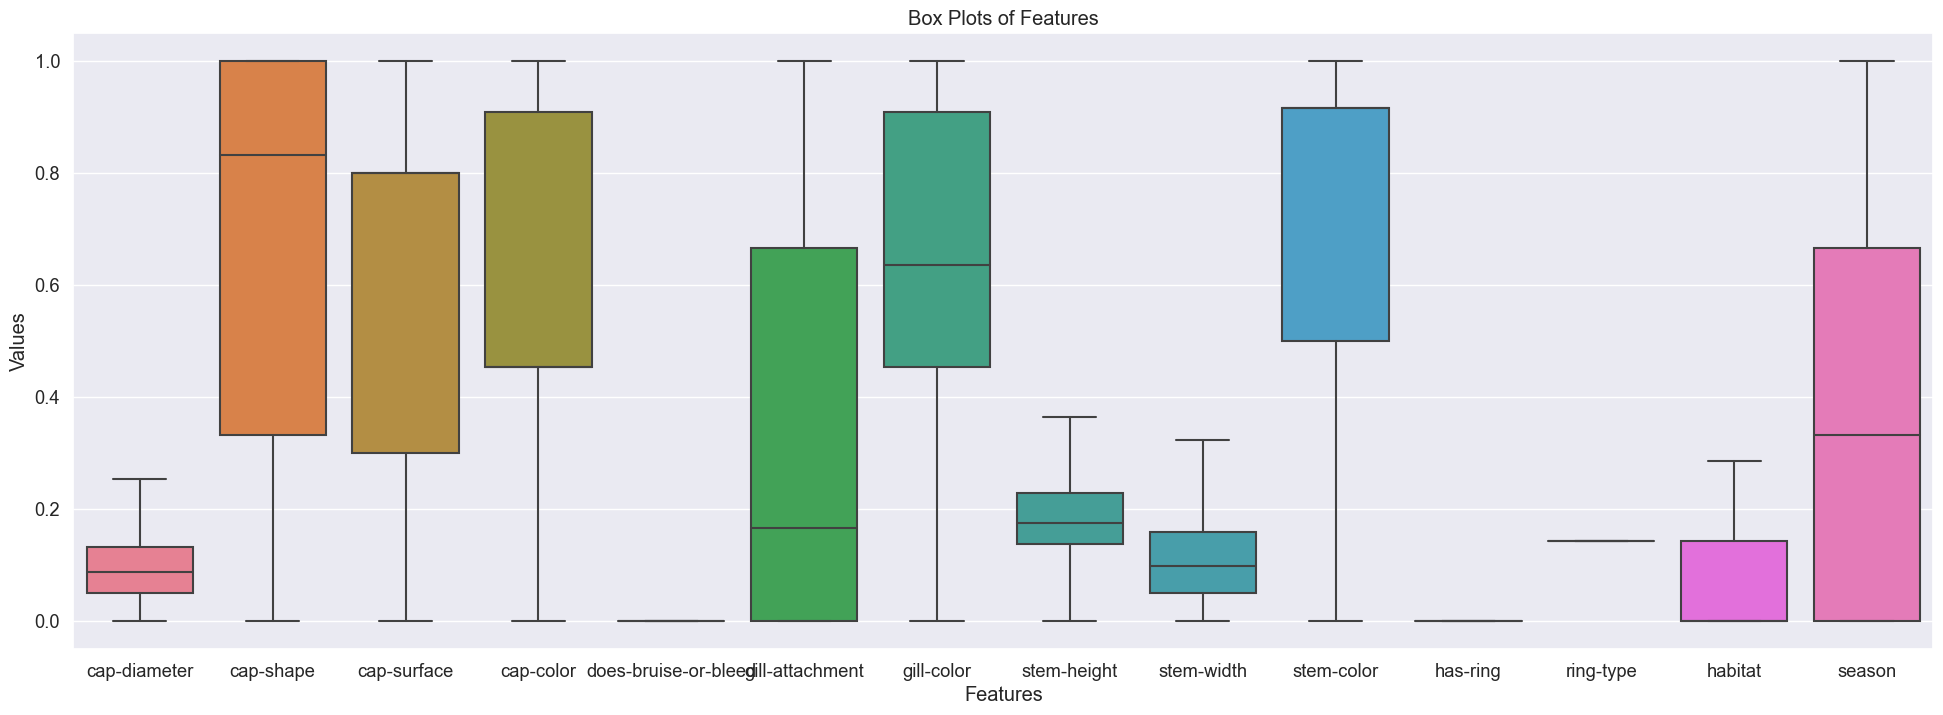

In [229]:
palette = sns.color_palette("husl", len(features))

# Create a box plot for outlier detections for each feature
plt.figure(figsize=(24, 8))
sns.boxplot(data=df_cleaned.drop(columns=["class"]), palette=palette, showfliers=False)

# Customize the plot
plt.title('Box Plots of Features')
plt.ylabel('Values')
plt.xlabel('Features')
plt.xticks(ticks=range(len(features)), labels=features)

plt.show()

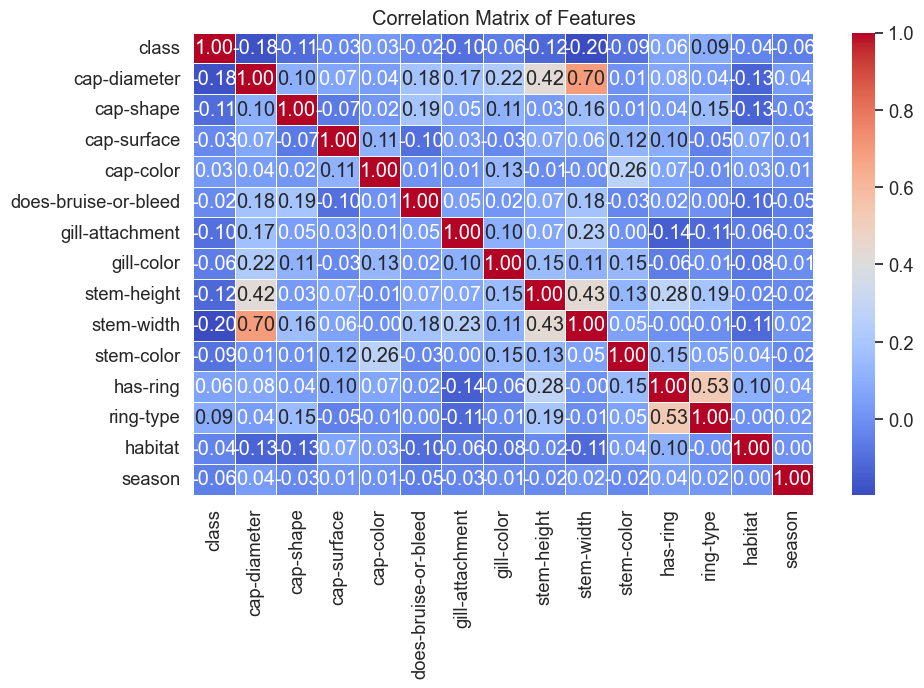

In [230]:
# Calculate the correlation matrix
correlation_matrix = df_cleaned.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Features')
plt.show()

In [231]:
legend_labels = {
    "cap-shape" : {
    'x': 'Convex',
    'f': 'Flat',
    'p': 'Spehrical',
    'b': 'Bell',
    'c': 'Conical',
    's': 'Sunken',
    'o': 'Others'
},
    "cap-surface" : {
    'g': 'Grooves',
    'h': 'Shiny',
    't': 'Sticky',
    'y': 'Scaly',
    'e': 'Fleshy',
    's': 'Smooth',
    'l': 'Leathery',
    'd': 'Dry',
    'w': 'Wrinkled',
    'i': 'Fibrous',
    'k': 'Silky'
},
    "cap-color" : {
    'o': 'Orange',
    'e': 'Red',
    'n': 'Brown',
    'g': 'Gray',
    'r': 'Green',
    'w': 'White',
    'y': 'Yellow',
    'p': 'Pink',
    'u': 'Purple',
    'b': 'Buff',
    'l': 'Blue',
    'k': 'Black'
},
    "does-bruise-or-bleed" : {
    'f': 'False (does not bruise or bleed)',
    't': 'True (bruises or bleeds)'
},
    "gill-attachment" : {
    'e': 'Free',
    'a': 'Adnate',
    'd': 'Decurrent',
    's': 'Sinuate',
    'x': 'Adnexed',
    'p': 'Pores',
    'f': 'None'
},
    "gill-color" : {
    'w': 'White',
    'n': 'Brown',
    'p': 'Pink',
    'u': 'Purple',
    'b': 'Buff',
    'g': 'Gray',
    'y': 'Yellow',
    'r': 'Green',
    'e': 'Red',
    'o': 'Orange',
    'k': 'Black',
    'f': 'Buff'
},
    "stem-color" : {
    'w': 'White',
    'y': 'Yellow',
    'n': 'Brown',
    'u': 'Purple',
    'b': 'Buff',
    'l': 'Blue',
    'r': 'Green',
    'p': 'Pink',
    'e': 'Red',
    'k': 'Black',
    'g': 'Gray',
    'o': 'Orange',
    'f': 'Buff'
},
    "has-ring" : {
    't': 'True (has a ring)',
    'f': 'False (does not have a ring)'
},
    "ring-type" : {
    'g': 'Grooves',
    'p': 'Pendant',
    'e': 'Evanescent',
    'l': 'Large',
    'f': 'None',
    'm': 'Movable',
    'r': 'Flaring',
    'z': 'Zone'
},
    "habitat" : {
    'd': 'Deciduous woods',
    'm': 'Meadows and fields',
    'g': 'Grasses',
    'h': 'Heaths',
    'l': 'Leaf litter',
    'p': 'Paths',
    'w': 'Waste',
    'u': 'Urban'
},
    "season" : {
    'w': 'Winter',
    'u': 'Summer',
    'a': 'Autumn',
    's': 'Spring'
},
    }

In [233]:
categorical_features = df_cleaned.drop(columns = ['class','cap-diameter', 'stem-height', 'stem-width']).columns.values
df_temp = df_cleaned_unlabelled.copy()

for column in categorical_features:
    df_temp[column] = df_cleaned_unlabelled[column].replace(legend_labels[column])
    

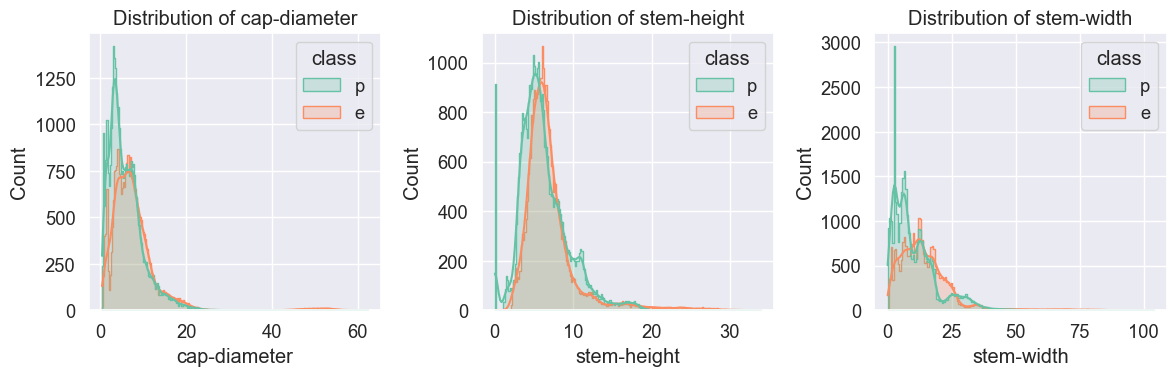

In [234]:
numerical_features = ['cap-diameter', 'stem-height', 'stem-width']

# Create subplots for numerical features
palette = sns.color_palette("Set2", n_colors=2) 
plt.figure(figsize=(12, 4))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(1, len(numerical_features), i)
    sns.histplot(data=df_temp, x=feature, hue='class', kde=True, element='step', common_norm=False, palette=palette)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')


plt.tight_layout()
plt.show()

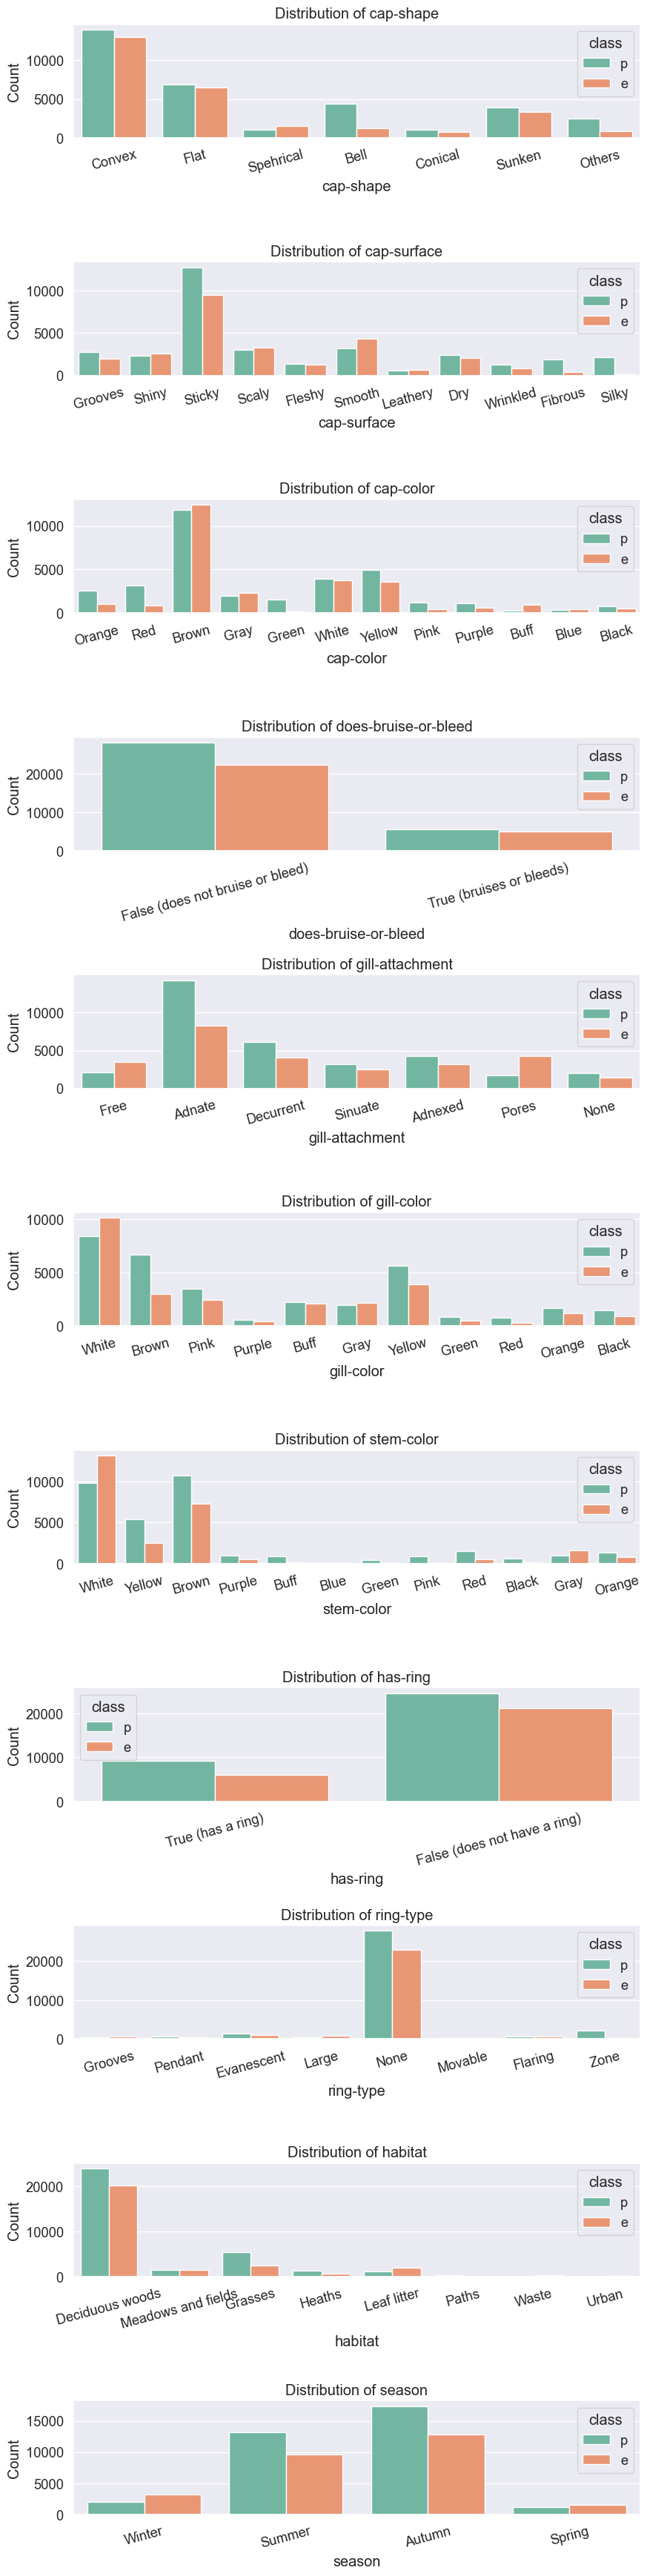

In [235]:
categorical_features = df_cleaned.drop(columns = ['class', 'cap-diameter', 'stem-height', 'stem-width']).columns.values

# Create subplots for categorical features
plt.figure(figsize=(9, 35))
for i, feature in enumerate(categorical_features, 1):
    palette = sns.color_palette('Set2', n_colors=len(df["class"].unique()))
    plt.subplot(len(categorical_features), 1, i)
    sns.countplot(x=feature, hue="class", data=df_temp, palette=palette)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
#     plt.gca().xaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter("{x:,.2f}"))
    plt.xticks(rotation=15)
    

plt.tight_layout()
plt.show()

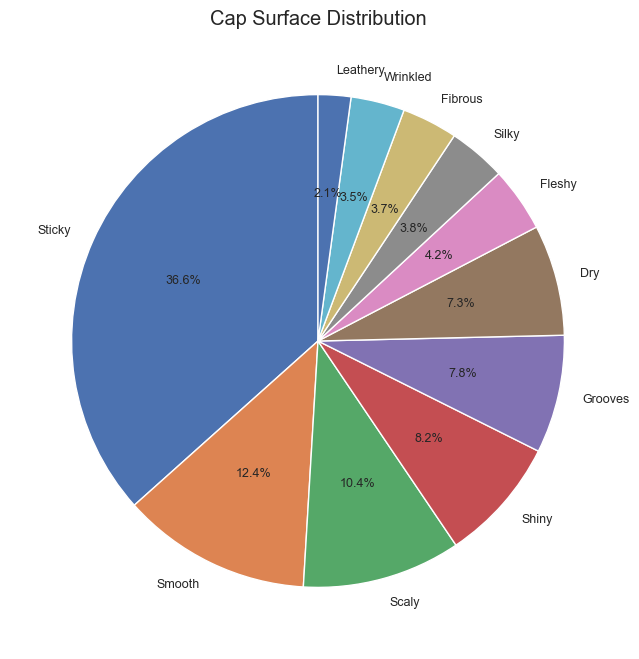

In [236]:
cap_surface_distribution = df_temp['cap-surface'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(cap_surface_distribution, labels=cap_surface_distribution.index, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 9})
plt.title('Cap Surface Distribution')
plt.show()

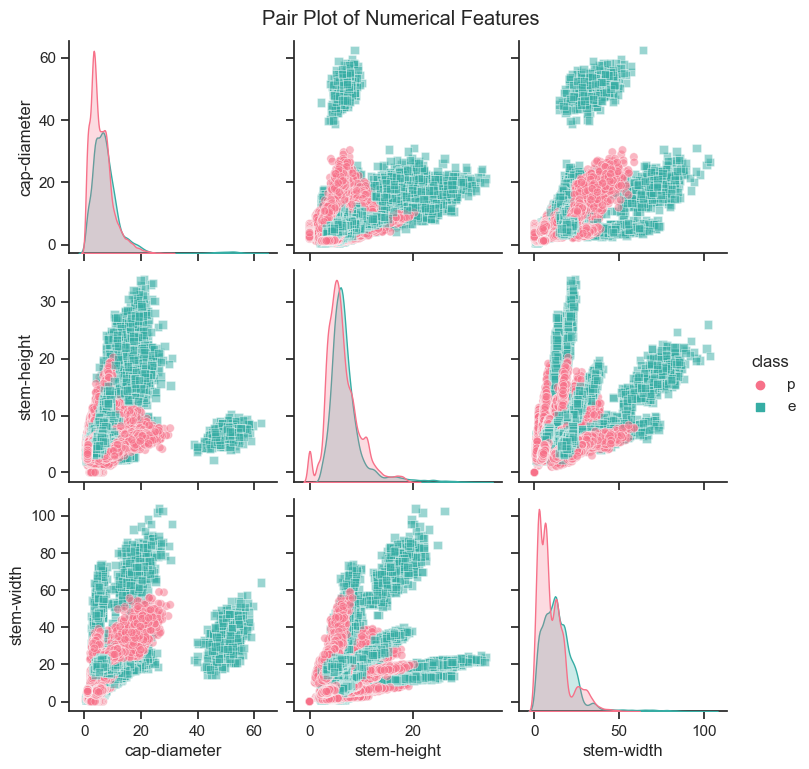

In [264]:
selected_features = ['class', 'cap-diameter', 'stem-height', 'stem-width']

# Set the style of seaborn
sns.set(style="ticks", color_codes=True)

# Create a pair plot
sns.pairplot(df_temp[selected_features], hue='class', palette='husl', markers=["o", "s"], plot_kws={'alpha': 0.5})
plt.suptitle('Pair Plot of Numerical Features', y=1.02)
plt.show()

In [238]:
# list_obj_cols = df_cleaned_unlabelled.columns[df_cleaned_unlabelled.dtypes == "object"].tolist()

# for obj in list_obj_cols:
#     df_cleaned_unlabelled[obj] = df_cleaned[obj].astype('category')
    
df_cleaned_unlabelled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60923 entries, 0 to 61068
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 60923 non-null  object 
 1   cap-diameter          60923 non-null  float64
 2   cap-shape             60923 non-null  object 
 3   cap-surface           60923 non-null  object 
 4   cap-color             60923 non-null  object 
 5   does-bruise-or-bleed  60923 non-null  object 
 6   gill-attachment       60923 non-null  object 
 7   gill-color            60923 non-null  object 
 8   stem-height           60923 non-null  float64
 9   stem-width            60923 non-null  float64
 10  stem-color            60923 non-null  object 
 11  has-ring              60923 non-null  object 
 12  ring-type             60923 non-null  object 
 13  habitat               60923 non-null  object 
 14  season                60923 non-null  object 
dtypes: float64(3), obje

In [239]:
df_cleaned_encoded = pd.get_dummies(df_cleaned_unlabelled, columns=categorical_features)

# Scaling Numerical Features using Min-Max scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_cleaned_encoded[['cap-diameter', 'stem-height', 'stem-width']] = scaler.fit_transform(df_cleaned_encoded[['cap-diameter', 'stem-height', 'stem-width']])

In [240]:
print("Feature Length:", df_cleaned_encoded.columns.size)

Feature Length: 90


In [241]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, precision_recall_curve, auc, roc_curve, accuracy_score
from sklearn.tree import DecisionTreeClassifier

In [242]:
X=df_cleaned_encoded.drop(['class'], axis=1)
Y=df_cleaned_encoded['class']

In [243]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [244]:
DT_model = DecisionTreeClassifier(random_state=42)
DT_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

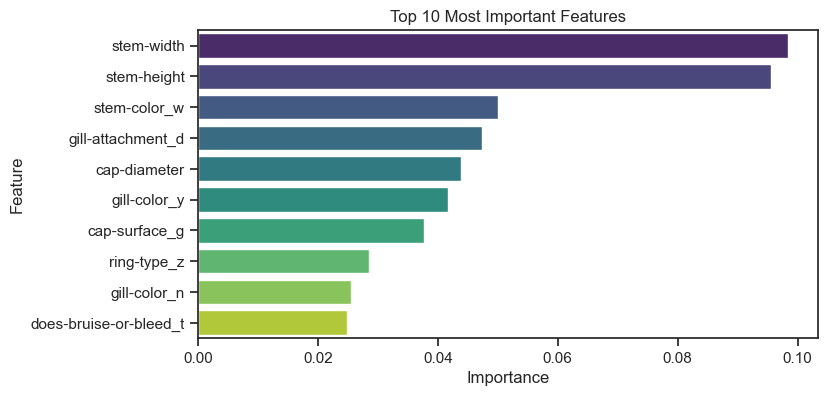

In [245]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances from the model
feature_importances = DT_model.feature_importances_

# Create a DataFrame with feature names and their importance scores
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the top N most important features
top_n = 10  # You can adjust this based on the number of features you want to display
plt.figure(figsize=(8, 4))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(top_n), palette='viridis')
plt.title(f'Top {top_n} Most Important Features')
plt.show()


In [246]:
y_pred = DT_model.predict(X_test)

## Model Evaluation

In [247]:
accuracy = accuracy_score(y_test, y_pred)
classification_report_output = classification_report(y_test, y_pred)

In [248]:
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report_output)

Accuracy: 0.99
Classification Report:
              precision    recall  f1-score   support

           e       0.99      0.99      0.99      5365
           p       1.00      0.99      1.00      6820

    accuracy                           0.99     12185
   macro avg       0.99      0.99      0.99     12185
weighted avg       0.99      0.99      0.99     12185



<Figure size 800x600 with 0 Axes>

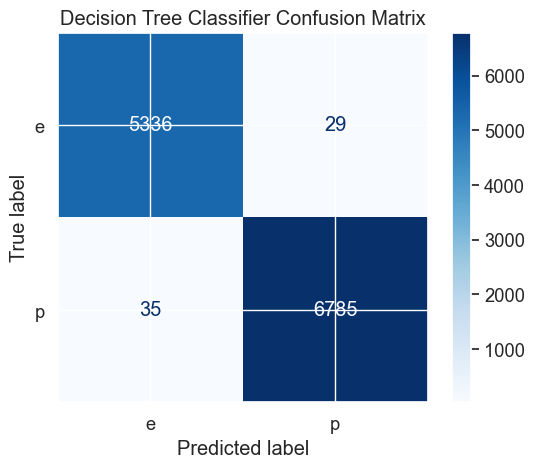

In [249]:
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8,6))
sns.set(font_scale=1.2)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=DT_model.classes_)
disp.plot(cmap='Blues', values_format='d')

plt.title('Decision Tree Classifier Confusion Matrix')
plt.show()

In [250]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    'max_depth': range(1, 21, 1)
}

# Create the GridSearchCV object
grid_search = GridSearchCV(DT_model, param_grid, cv=10, scoring='accuracy', n_jobs=-1)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and corresponding accuracy
best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Accuracy:", best_accuracy)

# Evaluate the model on the test set with the best parameters
best_classifier = grid_search.best_estimator_
y_pred = best_classifier.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)

print("Test Accuracy with Best Parameters:", test_accuracy)

Best Parameters: {'max_depth': 20}
Best Accuracy: 0.9913004175571205
Test Accuracy with Best Parameters: 0.9896594173163726


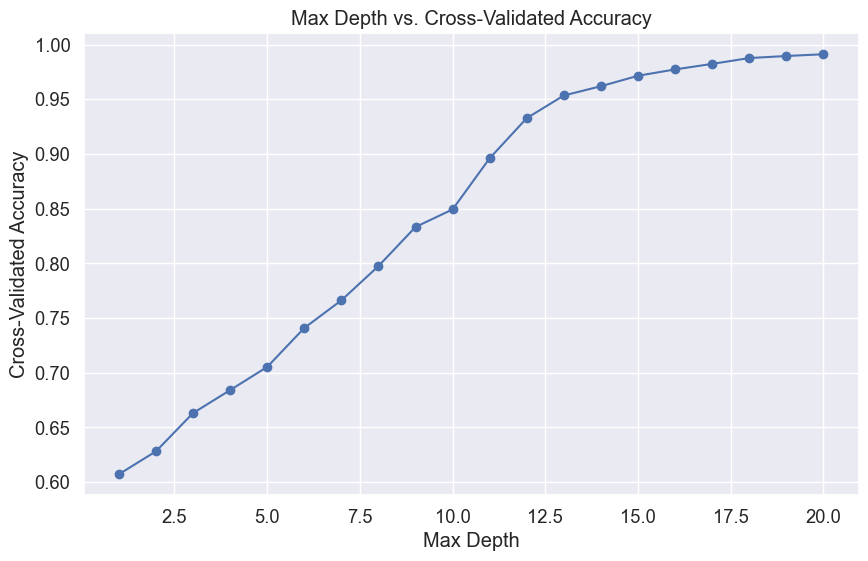

In [251]:
results = grid_search.cv_results_
max_depth_values = results['param_max_depth'].data

# Extract mean test scores
mean_test_scores = results['mean_test_score']

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(max_depth_values, mean_test_scores, marker='o', linestyle='-', color='b')
plt.title('Max Depth vs. Cross-Validated Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Cross-Validated Accuracy')
plt.grid(True)
plt.show()

In [282]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelBinarizer

# Convert string labels to binary format
label_binarizer = LabelBinarizer()
y_bin = label_binarizer.fit_transform(Y)

# Split the data into train_rfing and testing sets
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X, y_bin, test_size=0.2, random_state=42)

# Create the Random Forest classifier
RF_model = RandomForestClassifier(random_state=42, max_depth=8)

In [283]:
RF_model = RF_model.fit(X_train_rf, y_train_rf)

C:\Users\Nitesh Kesharwani\AppData\Local\Temp\ipykernel_22352\1237907975.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF_model = RF_model.fit(X_train_rf, y_train_rf)


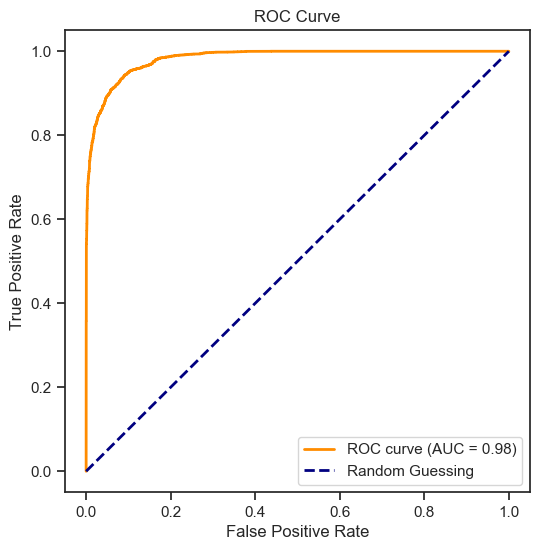

In [284]:
# Predict probabilities for the positive class
y_prob_rf = RF_model.predict_proba(X_test_rf)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test_rf, y_prob_rf)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [285]:
y_pred_RF = RF_model.predict(X_test_rf)

In [286]:
testing_accuracy = accuracy_score(y_test_rf, y_pred_RF)
classification_report_output = classification_report(y_test_rf, y_pred_RF)

In [287]:
print(f"Accuracy: {testing_accuracy:.2f}")
print("Classification Report:")
print(classification_report_output)

Accuracy: 0.93
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.92      0.92      5365
           1       0.93      0.93      0.93      6820

    accuracy                           0.93     12185
   macro avg       0.93      0.93      0.93     12185
weighted avg       0.93      0.93      0.93     12185



<Figure size 800x600 with 0 Axes>

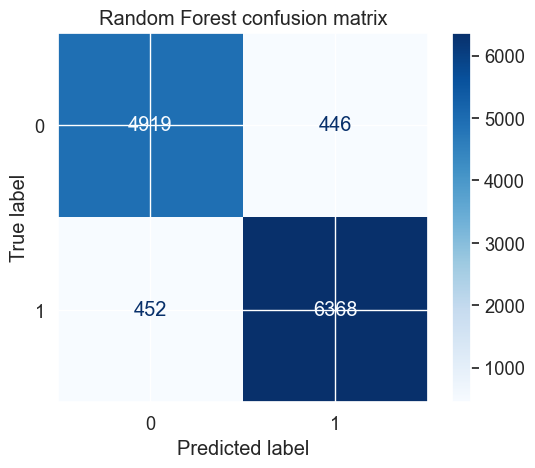

In [258]:
conf_matrix = confusion_matrix(y_test_rf, y_pred_RF)

# Plot confusion matrix
plt.figure(figsize=(8,6))
sns.set(font_scale=1.2)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=RF_model.classes_)
disp.plot(cmap='Blues', values_format='d')

plt.title('Random Forest confusion matrix')
plt.show()

In [259]:
from sklearn.linear_model import LogisticRegression

# Split the data into training and testing sets
X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(X, Y, test_size=0.2, random_state=42)

# Initialize the Logistic Regression model
logistic_model = LogisticRegression(max_iter=200)

In [260]:
# Train the model on the training set
logistic_model.fit(X_train_lr, y_train_lr)

LogisticRegression(max_iter=200)

In [261]:
# Make predictions on the test set
y_pred_lr = logistic_model.predict(X_test_lr)

In [262]:
# Evaluate the model
accuracy = accuracy_score(y_test_lr, y_pred_lr)
classification_rep = classification_report(y_test_lr, y_pred_lr)

# Display results
print(f"Accuracy: {accuracy:.4f}\n")
print("\nClassification Report:\n", classification_rep)

Accuracy: 0.7731


Classification Report:
               precision    recall  f1-score   support

           e       0.74      0.75      0.74      5365
           p       0.80      0.79      0.80      6820

    accuracy                           0.77     12185
   macro avg       0.77      0.77      0.77     12185
weighted avg       0.77      0.77      0.77     12185



<Figure size 800x600 with 0 Axes>

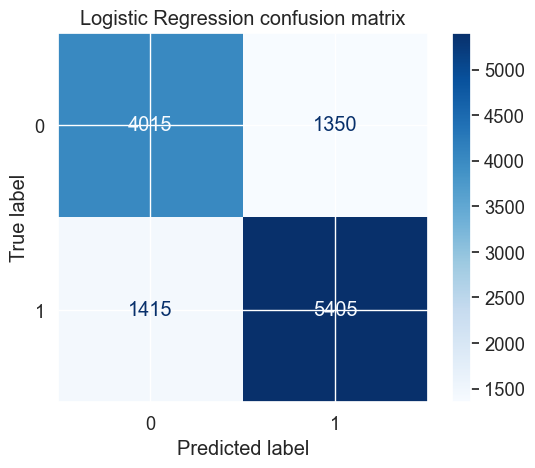

In [263]:
conf_matrix = confusion_matrix(y_test_lr, y_pred_lr)

# Plot confusion matrix
plt.figure(figsize=(8,6))
sns.set(font_scale=1.2)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=RF_model.classes_)
disp.plot(cmap='Blues', values_format='d')

plt.title('Logistic Regression confusion matrix')
plt.show()